In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
train = pd.read_excel('Data_Train.xlsx')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train.shape

(6019, 13)

In [3]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [0]:

# Obtaining the age of the car

# In presence of age attribute , Year is futile.......drop the feature

train['Age']  = 2019-train['Year']

train = train.drop(['Year'],axis=1)

# extracting the mileage

train['Mileage'] = train['Mileage'].str.extract('(\d+.\d+)')

# extracting the engine

train['Engine'] = train['Engine'].str.extract('(\d+)')

# extracting the power

train['Power'] = train['Power'].str.extract('(\d+.\d+)')

# extracting the manufacturer.....the importance of obtaining this feature will be known later

train['Manufacturer'] = [i.split(' ')[0] for i in train['Name']]


In [0]:
# mapping  plays a crucial role , as it determines the owner type

train['Owner_Type'] = train['Owner_Type'].map({'First':1,'Second':2,'Third':3,'Fourth & Above':4})

In [0]:
#converting type of mileage

train['Mileage'] = train['Mileage'].astype(float)


# New Feature

In [0]:
# Finding the fuel consumed per kilometers driven

train['Fuel_Consumed'] = train['Kilometers_Driven']/(train['Mileage'])

In [8]:
train.isnull().sum()

Name                    0
Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                1104
Seats                  42
New_Price            5195
Price                   0
Age                     0
Manufacturer            0
Fuel_Consumed           2
dtype: int64

In [0]:
# Still there are some missing values............need to be filled

train['Fuel_Consumed'] = train.Fuel_Consumed.fillna(train.Fuel_Consumed.mean())


Text(0, 0.5, 'Total Distance Driven')

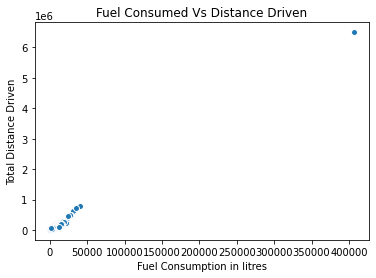

In [10]:
plt.scatter(x='Fuel_Consumed', y='Kilometers_Driven',data=train,edgecolors='w')
plt.title('Fuel Consumed Vs Distance Driven')
plt.xlabel('Fuel Consumption in litres')
plt.ylabel('Total Distance Driven')

In [0]:
# This is the perfect example of how data deceives us, if we have a glimpse we will realise that some values are far away 

# eventhough null-values are filled

# This phenomenon occurs due to the filling of values as 0 in Mileage which will raise our new feature to infinite

#  As outliers are invetable, we will ditch those values

In [0]:
# Removing the outliers based on the plot obtained

train = train.drop(train[(train['Fuel_Consumed']>22000) | (train['Mileage']<1)].index)

Text(0, 0.5, 'Total Distance Driven')

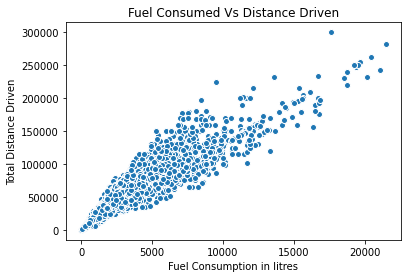

In [13]:
plt.scatter(x='Fuel_Consumed', y='Kilometers_Driven',data=train,edgecolors='w')
plt.title('Fuel Consumed Vs Distance Driven')
plt.xlabel('Fuel Consumption in litres')
plt.ylabel('Total Distance Driven')

In [0]:
# The results are staggering as there is huge change in plot

In [0]:
# The feature New_Price is the weak point of this..........eventhough it provides much of the data......

# Due to the presence of high volume of null values it is wise to drop the column

# Dropping the column with much NaN values

train = train.drop(['New_Price'],axis=1)

In [16]:
train.isnull().sum()

Name                    0
Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 25
Power                1055
Seats                  30
Price                   0
Age                     0
Manufacturer            0
Fuel_Consumed           0
dtype: int64

In [0]:
# Still there are null values

#Filling the Seats.......As an ideal car has 5 seats, better to fill with out any second thought

train['Seats'] = train['Seats'].fillna(5)

#Filling the values using median , as mean value is pointless, due to high amount of null values

train['Engine'] = train.groupby(['Manufacturer'])['Engine'].transform(lambda i:i.fillna(i.median()))

In [0]:
#Filling the power using Mean value

train.Power = train.groupby(['Manufacturer'])['Engine'].transform(lambda i:i.fillna(i.median()))

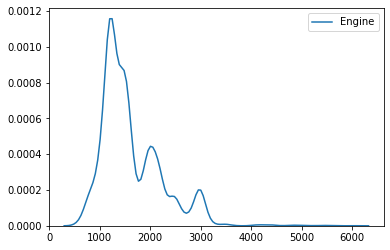

In [19]:
sb.kdeplot(train['Engine'])

In [20]:
train.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Manufacturer,Fuel_Consumed
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,1,26.60,998,998,5.0,1.75,9,Maruti,2706.766917
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,1,19.67,1582,1582,5.0,12.50,4,Hyundai,2084.392476
2,Honda Jazz V,Chennai,46000,Petrol,Manual,1,18.20,1199,1199,5.0,4.50,8,Honda,2527.472527
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,1,20.77,1248,1248,7.0,6.00,7,Maruti,4188.733751
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,2,15.20,1968,1968,5.0,17.74,6,Audi,2675.657895


In [0]:
# Drop the Name, as it doesn't manner in anyways

train = train.drop(['Name'],axis =1)

In [0]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [0]:
#Label Encoding the columns

for i in train.columns:
    
    if train[i].dtype=='object':
        
        train[i]=label.fit_transform(list(train[i].values))

In [24]:
train.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Manufacturer,Fuel_Consumed
0,9,72000,0,1,1,26.60,146,146,5.0,1.75,9,18,2706.766917
1,10,41000,1,1,1,19.67,42,42,5.0,12.50,4,10,2084.392476
2,2,46000,3,1,1,18.20,13,13,5.0,4.50,8,9,2527.472527
3,2,87000,1,1,1,20.77,15,15,7.0,6.00,7,18,4188.733751
4,3,40670,1,0,2,15.20,61,61,5.0,17.74,6,1,2675.657895


In [0]:
# Preserving the Target Variable

y = train['Price']

# Reckoning all the necessary data

X = train.drop(['Price'],axis = 1)


In [0]:
# Splitting the data

from sklearn.model_selection import train_test_split

# Considering the test size of 0.3 i.e., 30 % of data is taken under 

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

# Light GBM

In [0]:
import lightgbm as lgb

In [0]:
from sklearn.model_selection import KFold
from sklearn import metrics

In [0]:
#Setting the parameters
params = {
        "objective" : "regression",
        "metric" : "rmse",
        "boosting": "gbdt",
        "max_depth" : 5,
        "learning_rate" : 0.01,
        "feature_fraction" : 0.5,
        "num_leaves" : 64,
        "verbosity" : -1
    }

In [0]:
# As the light gbm has special characteristics than that of other models

# The train dataset dependent feature and independent features has to set under one varaible

lgb_train = lgb.Dataset(xtrain, ytrain)

In [0]:
# Same applies for Train Dataset

lgb_val = lgb.Dataset(xtest, ytest)

In [32]:

model = lgb.train(params, lgb_train, 10000, valid_sets = [lgb_val, lgb_train]
                  , valid_names = ['valid', 'train']
                      , early_stopping_rounds=30
                      , verbose_eval=100
                     )

Training until validation scores don't improve for 30 rounds.
[100]	train's rmse: 6.65329	valid's rmse: 6.50779
[200]	train's rmse: 4.96966	valid's rmse: 5.02251
[300]	train's rmse: 4.24181	valid's rmse: 4.41529
[400]	train's rmse: 3.88818	valid's rmse: 4.15142
[500]	train's rmse: 3.63973	valid's rmse: 3.9886
[600]	train's rmse: 3.45884	valid's rmse: 3.87837
[700]	train's rmse: 3.31262	valid's rmse: 3.80376
[800]	train's rmse: 3.20116	valid's rmse: 3.75034
[900]	train's rmse: 3.1105	valid's rmse: 3.70481
[1000]	train's rmse: 3.0324	valid's rmse: 3.66724
[1100]	train's rmse: 2.9648	valid's rmse: 3.63798
[1200]	train's rmse: 2.89605	valid's rmse: 3.61755
[1300]	train's rmse: 2.84355	valid's rmse: 3.6003
[1400]	train's rmse: 2.79025	valid's rmse: 3.58357
[1500]	train's rmse: 2.74074	valid's rmse: 3.56277
[1600]	train's rmse: 2.6955	valid's rmse: 3.54523
[1700]	train's rmse: 2.64987	valid's rmse: 3.5272
[1800]	train's rmse: 2.60447	valid's rmse: 3.51133
[1900]	train's rmse: 2.55839	valid's

In [0]:
lgb_pred = model.predict(xtest)

In [34]:
print(f'R2 Score of Light Gradient Boosting Machine is {r2_score(ytest,lgb_pred)}')
print('-'*100)
print(f'Mean Squared Error of Light Gradient Boosting Machine is {mean_squared_error(ytest,lgb_pred)}')
print('-'*100)
print(f'Mean Absolute Error of Light Gradient Boosting Machine is {mean_absolute_error(ytest,lgb_pred)}')

R2 Score of Light Gradient Boosting Machine is 0.9053778251924103
----------------------------------------------------------------------------------------------------
Mean Squared Error of Light Gradient Boosting Machine is 11.030587132832375
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Light Gradient Boosting Machine is 1.634608434161664
